In [40]:
# Import necessary libaries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from requests import get

In [41]:
from fake_useragent import UserAgent

ua1 = UserAgent()
randomHeader = {'User-Agent':str(ua1.random)}

In [42]:
# Make a request
url = 'https://covid19.ncdc.gov.ng'
response = get(url, randomHeader, headers = {"Accept-Language": "en-US, en;q=0.5"})

In [43]:
print(response.text[:500])

<!DOCTYPE html>
<html lang="en">
<meta http-equiv="content-type" content="text/html;charset=UTF-8" />
<head>
<title>NCDC Coronavirus COVID-19 Microsite</title>
<!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
<meta charset="utf-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui">
<meta


In [44]:
# Create a beautifulsoup object
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [45]:
# Locate table
covid_table = html_soup.find('div', class_ = 'table-responsive')

In [46]:
# Scrape table headers and pass into a list
table_heading = covid_table.thead.find_all('th')
headings = []
for th in table_heading:
    headings.append(th.text)
print(headings)

['States Affected', 'No. of Cases (Lab Confirmed)', 'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths']


In [47]:
# Scrape table rows and pass into a list
table_rows = []
for i in covid_table.tbody.find_all('tr'):
    table_rows.append(i.text.replace('\n', ' ').strip())
table_rows

['Lagos  12,275  10,329  1,786  160',
 'FCT  2,538  1,755  747  36',
 'Oyo  1,706  695  992  19',
 'Edo  1,678  692  929  57',
 'Delta  1,359  745  583  31',
 'Rivers  1,357  460  851  46',
 'Kano  1,303  221  1,030  52',
 'Ogun  1,080  353  705  22',
 'Kaduna  978  330  636  12',
 'Ondo  670  525  124  21',
 'Katsina  655  191  441  23',
 'Borno  586  96  455  35',
 'Gombe  530  102  407  21',
 'Bauchi  519  8  498  13',
 'Plateau  516   258  242  16',
 'Ebonyi  508  5  497  6',
 'Enugu  476  199  263  14',
 'Abia  405  107  295  3',
 'Imo  386  309  69  8',
 'Jigawa  321  2  308  11',
 'Kwara  311  131  168  12',
 'Bayelsa  299  128  153  18',
 'Nasarawa  244  123  113  8',
 'Osun  231  140  84  7',
 'Sokoto  153  2  135  16',
 'Niger  135  20  108  7',
 'Akwa Ibom  134  60  71  3',
 'Benue  121  80  35  6',
 'Adamawa  110  32  71  7',
 'Anambra  93  19  65  9',
 'Kebbi  86  16  63  7',
 'Zamfara  76  0  71  5',
 'Yobe  62  3  51  8',
 'Ekiti  49  7  40  2',
 'Taraba  27  16  11  0',

In [48]:
# Format table rows for dataframe
table_rows = [i.split() for i in table_rows]
table_rows

[['Lagos', '12,275', '10,329', '1,786', '160'],
 ['FCT', '2,538', '1,755', '747', '36'],
 ['Oyo', '1,706', '695', '992', '19'],
 ['Edo', '1,678', '692', '929', '57'],
 ['Delta', '1,359', '745', '583', '31'],
 ['Rivers', '1,357', '460', '851', '46'],
 ['Kano', '1,303', '221', '1,030', '52'],
 ['Ogun', '1,080', '353', '705', '22'],
 ['Kaduna', '978', '330', '636', '12'],
 ['Ondo', '670', '525', '124', '21'],
 ['Katsina', '655', '191', '441', '23'],
 ['Borno', '586', '96', '455', '35'],
 ['Gombe', '530', '102', '407', '21'],
 ['Bauchi', '519', '8', '498', '13'],
 ['Plateau', '516', '258', '242', '16'],
 ['Ebonyi', '508', '5', '497', '6'],
 ['Enugu', '476', '199', '263', '14'],
 ['Abia', '405', '107', '295', '3'],
 ['Imo', '386', '309', '69', '8'],
 ['Jigawa', '321', '2', '308', '11'],
 ['Kwara', '311', '131', '168', '12'],
 ['Bayelsa', '299', '128', '153', '18'],
 ['Nasarawa', '244', '123', '113', '8'],
 ['Osun', '231', '140', '84', '7'],
 ['Sokoto', '153', '2', '135', '16'],
 ['Niger', '

In [49]:
# Locate index position of Akwa Ibom
def get_index(strings, substr):
    for idx, string in enumerate(strings):
        if substr in string:
            break
    return idx

In [50]:
idx = get_index(table_rows, 'Akwa')

In [51]:
# Join 'Akwa' and 'Ibom'
del table_rows[idx][1]
table_rows[idx][0] = 'Akwa Ibom'
table_rows

[['Lagos', '12,275', '10,329', '1,786', '160'],
 ['FCT', '2,538', '1,755', '747', '36'],
 ['Oyo', '1,706', '695', '992', '19'],
 ['Edo', '1,678', '692', '929', '57'],
 ['Delta', '1,359', '745', '583', '31'],
 ['Rivers', '1,357', '460', '851', '46'],
 ['Kano', '1,303', '221', '1,030', '52'],
 ['Ogun', '1,080', '353', '705', '22'],
 ['Kaduna', '978', '330', '636', '12'],
 ['Ondo', '670', '525', '124', '21'],
 ['Katsina', '655', '191', '441', '23'],
 ['Borno', '586', '96', '455', '35'],
 ['Gombe', '530', '102', '407', '21'],
 ['Bauchi', '519', '8', '498', '13'],
 ['Plateau', '516', '258', '242', '16'],
 ['Ebonyi', '508', '5', '497', '6'],
 ['Enugu', '476', '199', '263', '14'],
 ['Abia', '405', '107', '295', '3'],
 ['Imo', '386', '309', '69', '8'],
 ['Jigawa', '321', '2', '308', '11'],
 ['Kwara', '311', '131', '168', '12'],
 ['Bayelsa', '299', '128', '153', '18'],
 ['Nasarawa', '244', '123', '113', '8'],
 ['Osun', '231', '140', '84', '7'],
 ['Sokoto', '153', '2', '135', '16'],
 ['Niger', '

In [52]:
idx = get_index(table_rows, 'Cross')

In [53]:
# Join 'Cross' and 'River'
del table_rows[idx][1]
table_rows[idx][0] = 'Cross River'
table_rows

[['Lagos', '12,275', '10,329', '1,786', '160'],
 ['FCT', '2,538', '1,755', '747', '36'],
 ['Oyo', '1,706', '695', '992', '19'],
 ['Edo', '1,678', '692', '929', '57'],
 ['Delta', '1,359', '745', '583', '31'],
 ['Rivers', '1,357', '460', '851', '46'],
 ['Kano', '1,303', '221', '1,030', '52'],
 ['Ogun', '1,080', '353', '705', '22'],
 ['Kaduna', '978', '330', '636', '12'],
 ['Ondo', '670', '525', '124', '21'],
 ['Katsina', '655', '191', '441', '23'],
 ['Borno', '586', '96', '455', '35'],
 ['Gombe', '530', '102', '407', '21'],
 ['Bauchi', '519', '8', '498', '13'],
 ['Plateau', '516', '258', '242', '16'],
 ['Ebonyi', '508', '5', '497', '6'],
 ['Enugu', '476', '199', '263', '14'],
 ['Abia', '405', '107', '295', '3'],
 ['Imo', '386', '309', '69', '8'],
 ['Jigawa', '321', '2', '308', '11'],
 ['Kwara', '311', '131', '168', '12'],
 ['Bayelsa', '299', '128', '153', '18'],
 ['Nasarawa', '244', '123', '113', '8'],
 ['Osun', '231', '140', '84', '7'],
 ['Sokoto', '153', '2', '135', '16'],
 ['Niger', '

In [54]:
# Pass table rows into data frame
data = pd.DataFrame(table_rows)
data.head()

,0,1,2,3,4
0,Lagos,"12,275","10,329","1,786",160
1,FCT,"2,538","1,755",747,36
2,Oyo,"1,706",695,992,19
3,Edo,"1,678",692,929,57
4,Delta,"1,359",745,583,31


In [55]:
# Set table headers from headings list
data.columns = headings
data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"12,275","10,329","1,786",160
1,FCT,"2,538","1,755",747,36
2,Oyo,"1,706",695,992,19
3,Edo,"1,678",692,929,57
4,Delta,"1,359",745,583,31


In [56]:
# Remove all commas from columns
data.replace(',','', regex=True, inplace=True)

In [57]:
col = data.select_dtypes(object).columns[1:]
data[col] = data[col].apply(pd.to_numeric, errors='coerce')

In [58]:
data.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

In [59]:
# Rename FCT to Abuja FCT
data.loc[data['States Affected'] == 'FCT', 'States Affected'] = 'Federal Capital Territory'

In [60]:
data.columns = ['States', 'Cases', 'Infected', 'Recoveries', 'Deaths']

In [61]:
data.head(3)

,States,Cases,Infected,Recoveries,Deaths
0,Lagos,12275,10329,1786,160
1,Federal Capital Territory,2538,1755,747,36
2,Oyo,1706,695,992,19


In [62]:
# Export data frame to csv
data.to_csv('covid_nigeria.csv')

In [63]:
# Import libararies for map plotting
import geopandas as gpd
import geoplot as gpt
import matplotlib.pyplot as plt

In [64]:
# Load SHP files
shp = r'shapefile/Nigeria_Poly.shp'
shapefile = gpd.read_file(shp)

In [65]:
type(shapefile), shapefile.shape

(geopandas.geodataframe.GeoDataFrame, (37, 16))

In [66]:
shapefile.columns

Index(['id', 'country', 'name', 'enname', 'locname', 'offname', 'boundary',
       'adminlevel', 'wikidata', 'wikimedia', 'timestamp', 'note', 'path',
       'rpath', 'iso3166_2', 'geometry'],
      dtype='object')

In [67]:
# Drop unecassary columns
shapefile = shapefile.drop(['id', 'country', 'name', 'enname', 'offname', 'boundary',
       'adminlevel', 'wikidata', 'wikimedia', 'timestamp', 'note', 'path',
       'rpath', 'iso3166_2'], axis=1)

In [68]:
shapefile.columns = ['States', 'geometry']

In [69]:
shapefile.head(2)

,States,geometry
0,Abia,"POLYGON ((7.14043 4.90063, 7.14377 4.91320, 7...."
1,Adamawa,"POLYGON ((11.34152 8.01867, 11.34154 8.02210, ..."


In [70]:
# Merge GeoDataFrame with covid statistics data
data = shapefile.merge(data, left_on='States', right_on='States')

In [71]:
type(data), data.shape

(geopandas.geodataframe.GeoDataFrame, (37, 6))

In [72]:
data.head(2)

,States,geometry,Cases,Infected,Recoveries,Deaths
0,Abia,"POLYGON ((7.14043 4.90063, 7.14377 4.91320, 7....",405,107,295,3
1,Adamawa,"POLYGON ((11.34152 8.01867, 11.34154 8.02210, ...",110,32,71,7


In [73]:
# Define plot function
def visual(data, hue, cmap):
    fig, ax = plt.subplots(1, figsize=(38, 13))
    ax.set_title('Coronavirus {} by States'.format(hue), fontdict={'fontsize': '20', 'fontweight' : '3'})
    gpt.choropleth(data, hue=hue, cmap=cmap,
                   legend=True,edgecolor='lightgray', linewidth=0.1,
                   ax=ax,legend_kwargs={'aspect':30, 'label':'Counts', 'fraction':0.036, 'pad':0, 'orientation':'horizontal'});

    data['coords'] = data['geometry'].apply(lambda x: x.representative_point().coords[:])
    data['coords'] = [coords[0] for coords in data['coords']]

    for idx, row in data.iterrows():
        ax.annotate(s=row['States'], xy=row['coords'], color='black', fontsize=13, horizontalalignment='center')
        plt.savefig('{}.png'.format(hue.lower()), dpi=150)

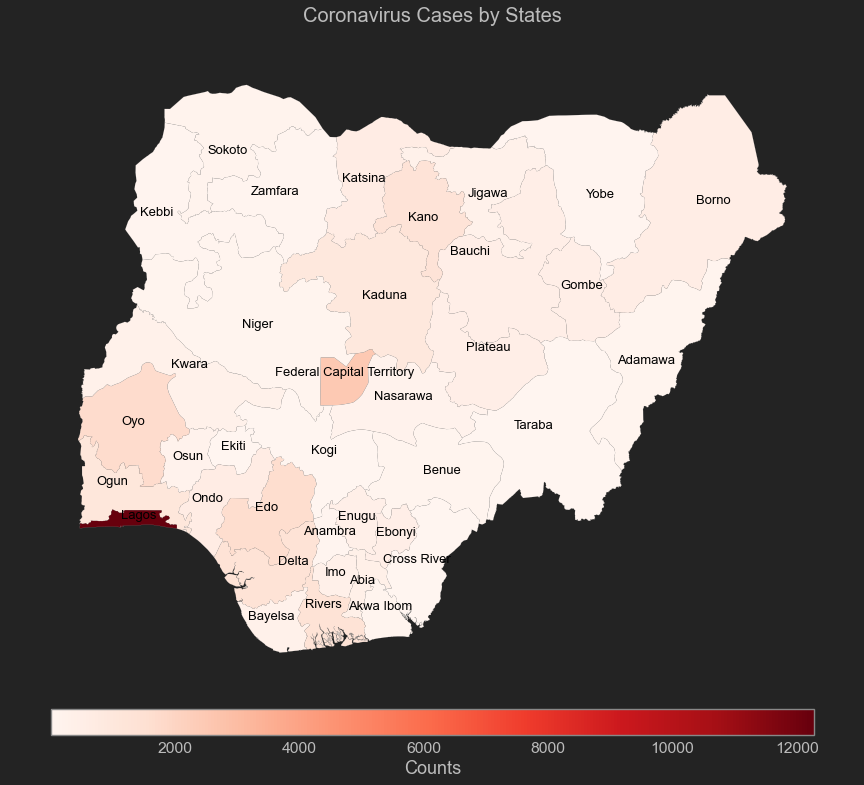

In [96]:
# Plot geomap for cases
visual(data, 'Cases', 'Reds')

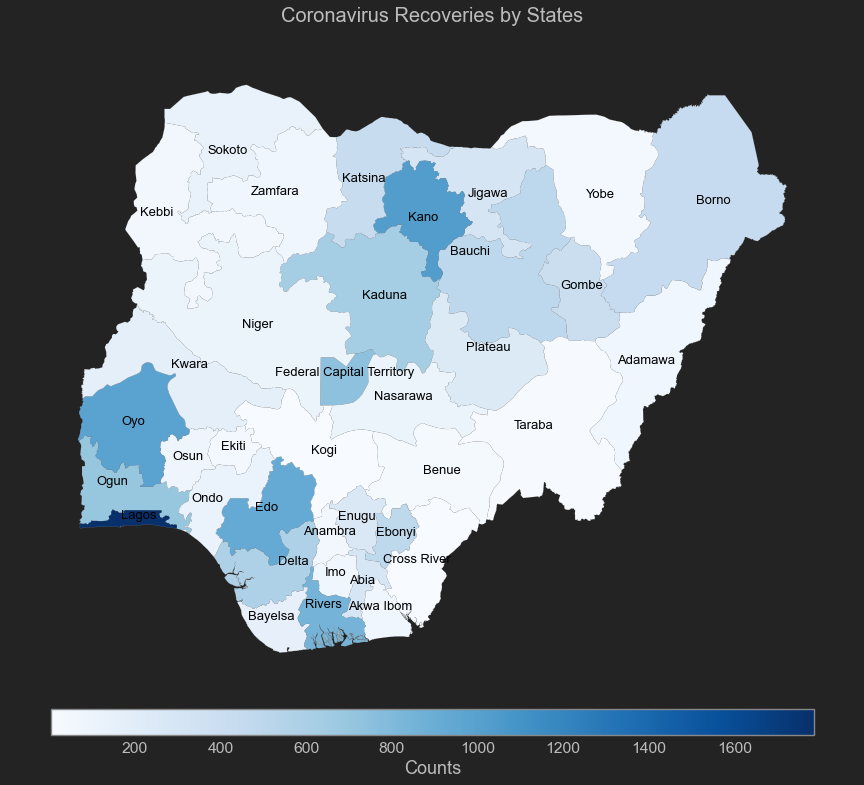

In [97]:
# Plot geomap for recoveries
visual(data, 'Recoveries', 'Blues')

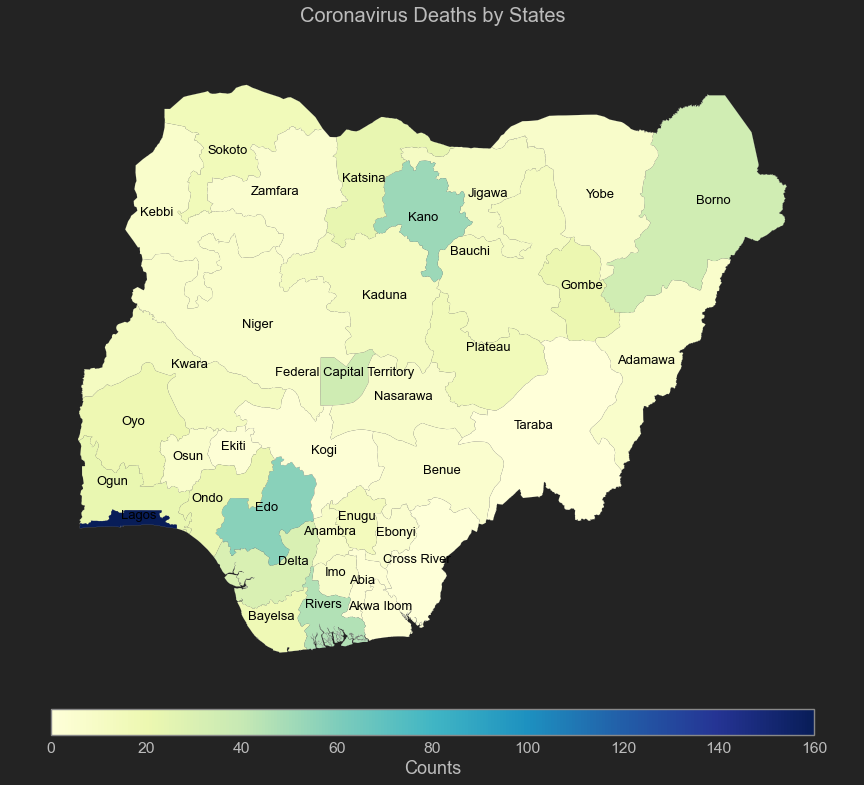

In [98]:
# Plot geomap for deaths
visual(data, 'Deaths', 'YlGnBu')

<h1 align='center'>Time Series Data</h1>

<p>Download data from Johns Hopkins University (JHU) Center for Systems Science and Engineering's (CSSE) GitHub repository</p>

In [78]:
cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [79]:
recovs = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [80]:
deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [81]:
# Read data into data frame
df_cases = pd.read_csv(cases)
df_recovs = pd.read_csv(recovs)
df_deaths = pd.read_csv(deaths)

In [82]:
# Extract confirmed cases data for Nigeria
df_cases.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_cases.set_index('Country/Region', inplace=True)
df_cases = df_cases.loc['Nigeria']
df_cases = pd.DataFrame(df_cases)
df_cases.columns = ['Cases']
df_cases = df_cases.loc['2/28/20':]

In [83]:
# Extract recoveries data for Nigeria
df_recovs.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_recovs.set_index('Country/Region', inplace=True)
df_recovs = df_recovs.loc['Nigeria']
df_recovs = pd.DataFrame(df_recovs)
df_recovs.columns = ['Recoveries']
df_recovs = df_recovs.loc['2/28/20':]

In [84]:
# Extract death data for Nigeria
df_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)
df_deaths.set_index('Country/Region', inplace=True)
df_deaths = df_deaths.loc['Nigeria']
df_deaths = pd.DataFrame(df_deaths)
df_deaths.columns = ['Deaths']
df_deaths = df_deaths.loc['2/28/20':]

In [85]:
# Merge cases, recoveriies and death data into one data frame
time_series = pd.concat([df_cases, df_recovs, df_deaths], axis=1, ignore_index=False)

In [86]:
# Rename columns
time_series.reset_index(inplace=True)
time_series.columns = ['Time', 'Cases', 'Recoveries', 'Deaths']

In [87]:
# Set time column type to datetime

#date = pd.date_range("1 22 2020", periods=time_series.shape[0], freq="D", name="date")
time_series['Time'] = pd.to_datetime(time_series['Time'], errors='coerce')

In [88]:
# Make time column index of the data frame
time_series.set_index('Time', inplace=True)

In [89]:
time_series = time_series.asfreq('D', method = 'ffill')

In [90]:
time_series.head()

,Cases,Recoveries,Deaths
Time,,,
2020-02-28,1,0,0
2020-02-29,1,0,0
2020-03-01,1,0,0
2020-03-02,1,0,0
2020-03-03,1,0,0


In [91]:
# Export time series data to csv
time_series.to_csv('time_series.csv')

In [92]:
# Import libraries for plotting
import seaborn as sns
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

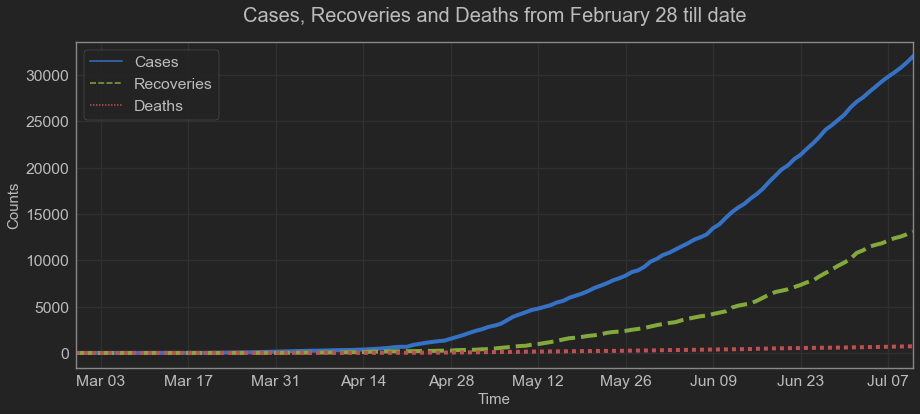

In [95]:
fig, ax = plt.subplots(figsize=(15, 6))
jtplot.style(theme='monokai', context='notebook', fscale=1.5, spines=True)
sns.lineplot(data=time_series, ax=ax, linewidth=4)
ax.set_title('Cases, Recoveries and Deaths from February 28 till date', fontdict={'fontsize': '20', 'fontweight' : '3'}, pad=20)
ax.set_ylabel('Counts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Time', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlim(time_series.index[0], time_series.index[-1])

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# Format x-tick labels to show at 2 weeks interval
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# Save figure
plt.savefig('line-plot.png', dpi=150)

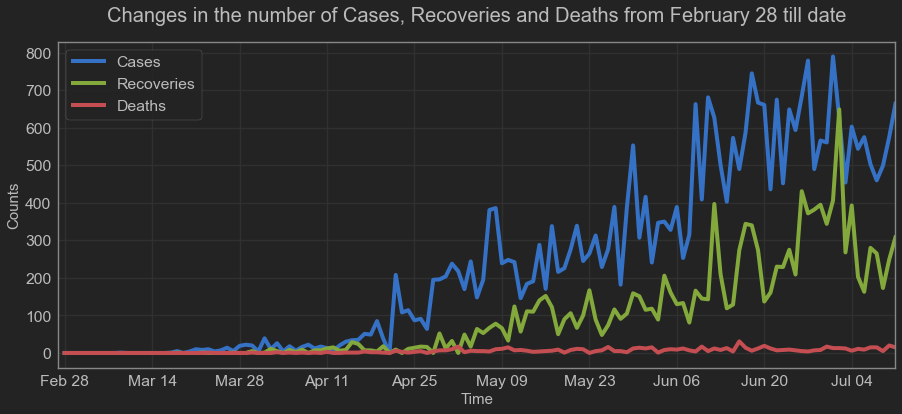

In [94]:
fig, ax = plt.subplots(figsize=(15, 6))
jtplot.style(theme='monokai', context='notebook', fscale=1.5, spines=True)
time_series.diff().plot(ax=ax, linewidth=4)
ax.set_title('Changes in the number of Cases, Recoveries and Deaths from February 28 till date', fontdict={'fontsize': '20', 'fontweight' : '3'}, pad=20)
ax.set_ylabel('Counts', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlabel('Time', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_xlim(time_series.index[0], time_series.index[-1])

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
# Format x-tick labels to show at 2 weeks interval
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
# Save figure
plt.savefig('time-lag.png', dpi=150)